### Digits recognition using CNN

#### Loading required packages

In [1]:
%pylab inline

import pandas as pd
import os
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.
/home/sivaji/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
%%bash

ls -ltra

total 1596
-rw-rw-r-- 1 sivaji sivaji 229300 Aug 21 16:00 FirstFile.ipynb
-rw-rw-r-- 1 sivaji sivaji 281359 Aug 21 16:09 SimpleDl.ipynb
-rw-rw-r-- 1 sivaji sivaji 155700 Aug 21 16:10 Changes.ipynb
-rw-rw-r-- 1 sivaji sivaji  35458 Sep  2 00:32 Untitled.ipynb
-rw-rw-r-- 1 sivaji sivaji      0 Nov 29 16:07 imagesdata.p
-rw-rw-r-- 1 sivaji sivaji 413834 Nov 30 07:31 CatsVsDogs_SimpleANN.ipynb
drwxrwxr-x 5 sivaji sivaji   4096 Dec  7 18:10 ..
-rw-rw-r-- 1 sivaji sivaji 232316 Dec  8 07:01 ANN.ipynb
drwxr-xr-x 2 sivaji sivaji   4096 Dec  8 07:37 .ipynb_checkpoints
-rw-rw-r-- 1 sivaji sivaji 258734 Dec  8 21:27 CNN.ipynb
drwxrwxr-x 3 sivaji sivaji   4096 Dec  8 21:27 .


#### Reading training files and it's labes

In [3]:
trainfiels = os.listdir('../train/')
testfiles = os.listdir('../test/')

(499, 375, 3)

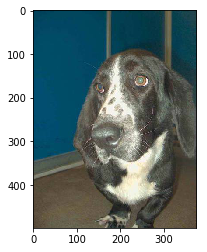

In [4]:
path  = '../train/'
img = imread(path + trainfiels[0])
plt.imshow(img)
img.shape

/home/sivaji/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


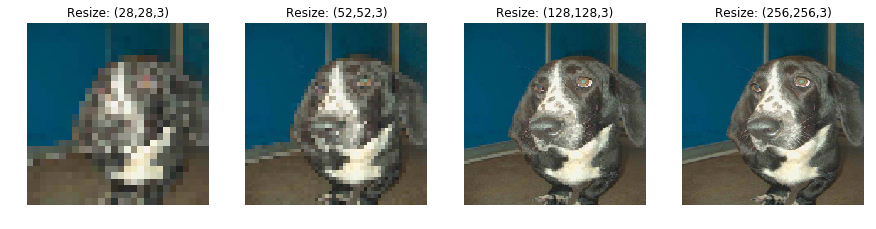

In [5]:
f, axs = plt.subplots(1,4)
f.set_figheight(10)
f.set_figwidth(15)
np.vectorize(lambda ax:ax.axis('off'))(axs)
axs[0].imshow(resize(img,(28,28,3)))
axs[0].set_title('Resize: (28,28,3)')
axs[1].imshow(resize(img,(52,52,3)))
axs[1].set_title('Resize: (52,52,3)')
axs[2].imshow(resize(img,(128,128,3)))
axs[2].set_title('Resize: (128,128,3)')
axs[3].imshow(resize(img,(256,256,3)))
axs[3].set_title('Resize: (256,256,3)')
plt.show()

#### Reading images from the disk and creating as an numpy array

In [6]:
path  = '../train/'
train_x = []
label  = []
for f in trainfiels:
    img = imread(path + f,flatten= True,mode = 'L')
    img = resize(img,(128,128,3))
    train_x.append(img)
    label.append(f.lower().find('dog') +1)
    
train_x = np.array(train_x)
train_y = np.array(label)

/home/sivaji/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


#### Spliting training data into train and validation

In [7]:
trainx, valx, trainy,valy = train_test_split(train_x,train_y,test_size=.3)

# converting lables into dummies
trainy = to_categorical(trainy)
valy = to_categorical(valy)

In [8]:
trainx.shape

(17500, 128, 128, 3)

#### Training a model

In [9]:
## building CNN layers
model = Sequential() 
model.add(Conv2D(150,( 3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(52, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(752, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
# model.output_shape

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainx, trainy, batch_size=32, epochs=10, verbose=1,validation_data=(valx,valy))

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 1720s 98ms/step - loss: 0.6847 - acc: 0.5590 - val_loss: 0.6604 - val_acc: 0.6044
Epoch 2/10
17500/17500 [==============================] - 1721s 98ms/step - loss: 0.6499 - acc: 0.6191 - val_loss: 0.6410 - val_acc: 0.6288
Epoch 3/10
17500/17500 [==============================] - 1722s 98ms/step - loss: 0.6156 - acc: 0.6655 - val_loss: 0.6175 - val_acc: 0.6619
Epoch 4/10
17500/17500 [==============================] - 1715s 98ms/step - loss: 0.5675 - acc: 0.7115 - val_loss: 0.5606 - val_acc: 0.7127
Epoch 5/10
17500/17500 [==============================] - 1716s 98ms/step - loss: 0.4896 - acc: 0.7638 - val_loss: 0.5217 - val_acc: 0.7419
Epoch 6/10
17500/17500 [==============================] - 1713s 98ms/step - loss: 0.4124 - acc: 0.8110 - val_loss: 0.5080 - val_acc: 0.7587
Epoch 7/10
17500/17500 [==============================] - 1713s 98ms/step - loss: 0.3104 - acc: 0.8645 - val_lo

In [14]:
valpred = model.predict(valx)
print('Accuracy in validation:', accuracy_score(np.argmax(valy,axis=1),np.argmax(valpred,axis = 1)))

Accuracy in validation: 0.750533333333


In [15]:
path  = '../test/'
test_x = []
for f in testfiles:
    img = imread(path + f,flatten= True,mode = 'L')
    img = resize(img,(128,128,3))
    test_x.append(img)
    
test_x = np.array(test_x)

/home/sivaji/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [16]:
testpred = model.predict(test_x)
submit = pd.DataFrame({'id':testfiles,'prob_dog':testpred[:,1]})
submit.head(10)

,id,prob_dog
0,2538.jpg,0.000648
1,12489.jpg,0.027989
2,2605.jpg,0.999792
3,1279.jpg,0.984088
4,12233.jpg,0.025245
5,1992.jpg,0.060214
6,12007.jpg,0.845905
7,2306.jpg,0.998098
8,2412.jpg,0.111360
9,11306.jpg,0.993656
